In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

In [3]:
df=pd.read_csv('hr.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных 

In [4]:
# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

clmb = list(df)

HR_Statistics = pd.DataFrame(index = range(len(clmb)-2), 
                             columns = ["Var_Name","Mean", "Mediana", "Mode", "Min", "Max", "Deviation"]) 


for i in range(len(clmb)-2): 
         HR_Statistics["Var_Name"][i] = clmb[i]
         HR_Statistics["Mean"][i] = statistics.mean(df[clmb[i]])
         HR_Statistics["Mediana"][i] = statistics.median(df[clmb[i]])
         try: 
            HR_Statistics["Mode"][i] = statistics.mode(df[clmb[i]])
         except:
            HR_Statistics["Mode"][i] = float('nan') 
         HR_Statistics["Min"][i] = min(df[clmb[i]])
         HR_Statistics["Max"][i] = max(df[clmb[i]])
         HR_Statistics["Deviation"][i] = statistics.pstdev(df[clmb[i]])

HR_Statistics 

,Var_Name,Mean,Mediana,Mode,Min,Max,Deviation
0,satisfaction_level,0.612834,0.64,0.1,0.09,1,0.248622
1,last_evaluation,0.716102,0.72,0.55,0.36,1,0.171163
2,number_project,3.80305,4,4,2,7,1.23255
3,average_montly_hours,201.05,200,NaN,96,310,49.9414
4,time_spend_company,3.49823,3,3,2,10,1.46009
5,Work_accident,0.14461,0,0,0,1,0.351707
6,left,0.238083,0,0,0,1,0.42591
7,promotion_last_5years,0.0212681,0,0,0,1,0.144277


Для удобства создаем ДатаФрейм где столбцы - имена статичтичеких показателей. И в цикле пизводим вычисления.  
Традиционна есть проблема с Модой, когда  может не быть повторяющихся значений у параметра.   Провереям на 
начличие ошибки - если есть Мода = NaN.    

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

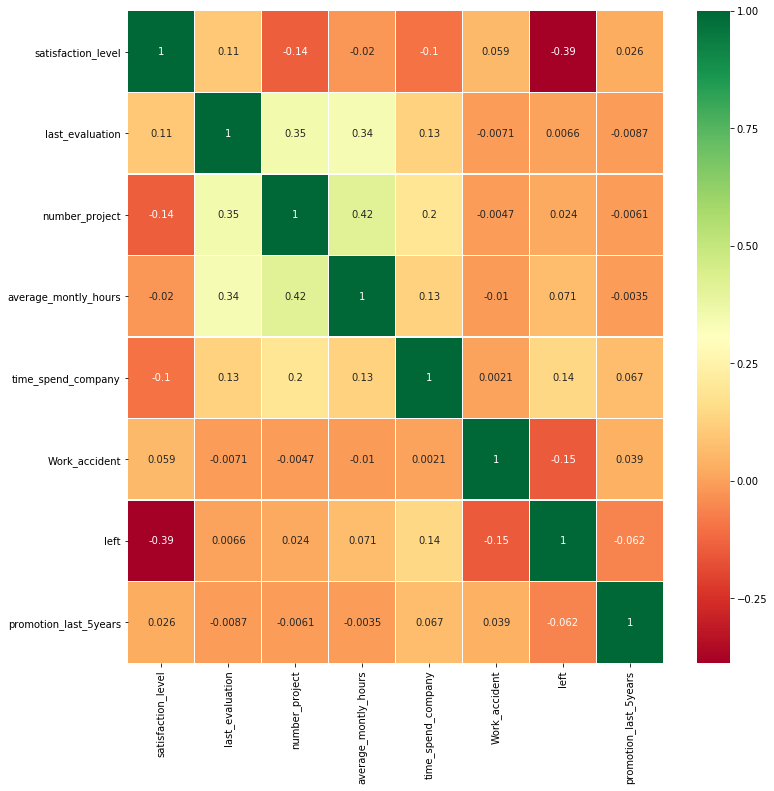

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

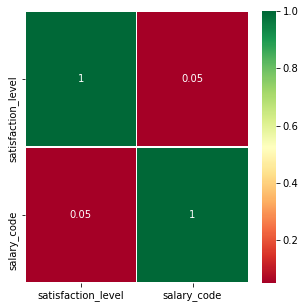

In [4]:
def salary_code(row):
    if row['salary']=='low': return 1
    if row['salary']=='medium': return 2
    if row['salary']=='high': return 3

df['salary_code'] = df.apply(salary_code, axis=1)

sns.heatmap(df[['satisfaction_level','salary_code']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

# Не берусь судить,  насколько корректно было заменить уровени Salary на значения 1,2 и 3 - но похоже уровень 
# удовлетворенности тоже от ЗП не зависит.


Выводы: из матрицы следует, что корреляции между параметрами особо не наблюдается. Самый высокий показатель -  number_projects  (кол-во проекитов) и average_montly_hours (сколько работает в месяц). Что логично.  Причина в том, 
что в данных нет самого важного показателя - денег,  т.е. заработной платы. Есть градация на L,M,H.  Таким образом,  нет каких-то выраженных зависимостей между параметрами. И выявить причины удовлетворённости / неудовлетворённости 
сотрудников по этим данным сложно.  Единственное что интересно: нет выраженной корреляции удовлетворенность в прошлый опрос, и в новом исследовании.   Т.е. удовлетворенность  сотрудника могла измениться непредсказуемым образом, в том году очень доволен, а этом уже не доволен.   Т.е. факторы которые влияют  на удовлетворённость не попали  в предмет исследование. 


# 4.Визуализировать несколько взаимосвязей между переменными.

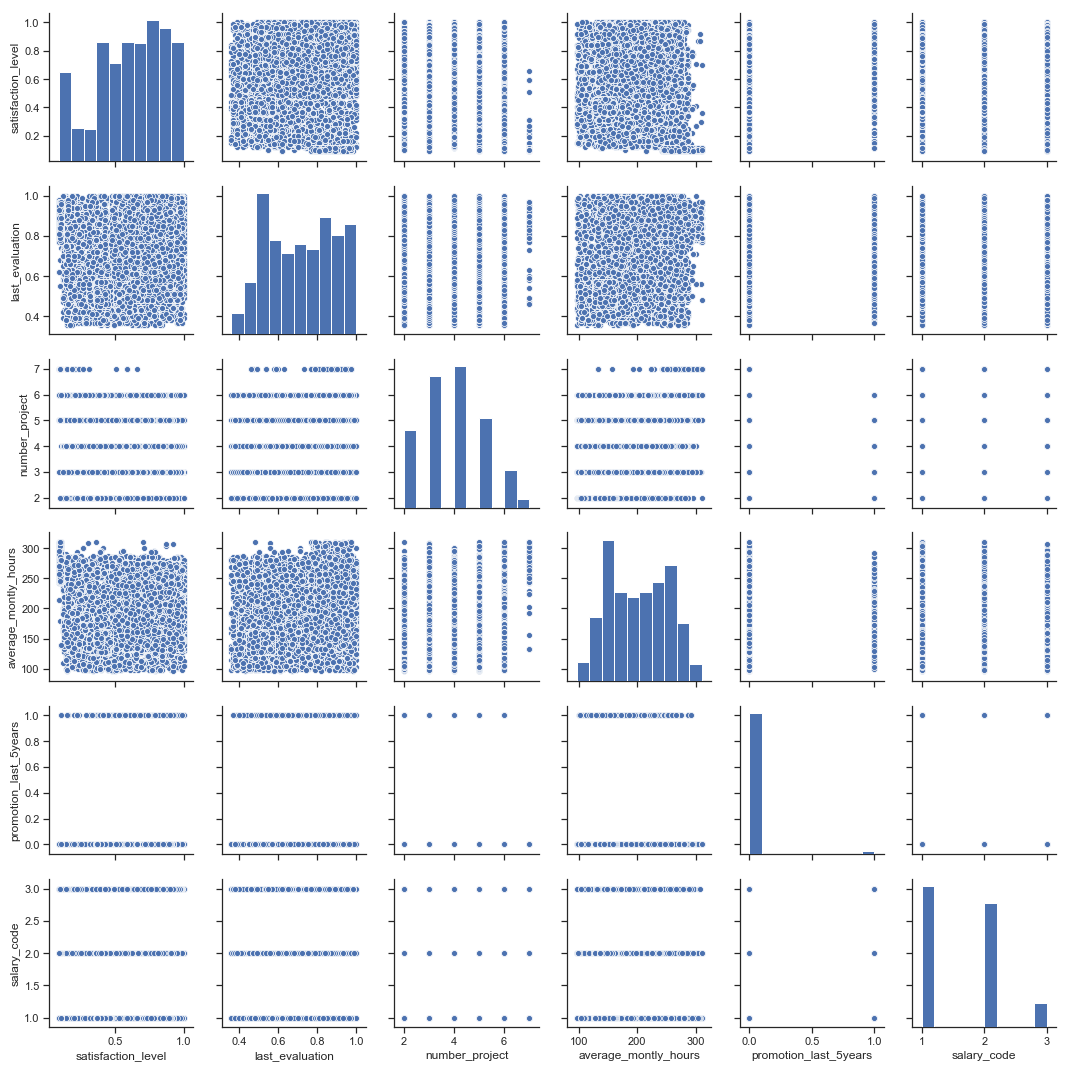

In [128]:

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 
                     'average_montly_hours', 'promotion_last_5years', 'salary_code']])


# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [107]:
satisfaction_level = df['satisfaction_level']

last_evaluation = df['last_evaluation']

average_montly_hours = df['average_montly_hours']


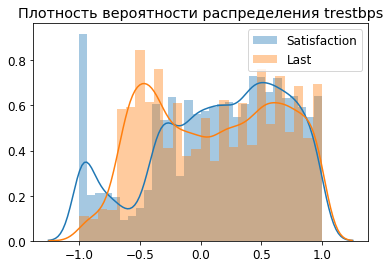

In [105]:
from sklearn import preprocessing


Satisfaction_1 = satisfaction_level - statistics.mean(satisfaction_level)
Last_1 = last_evaluation - statistics.mean(last_evaluation)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Satisfaction_Norm = min_max_scaler.fit_transform(np.array(Satisfaction_1).reshape(-1, 1))
Last_Norm = min_max_scaler.fit_transform(np.array(Last_1).reshape(-1, 1))

sns.distplot(Satisfaction_Norm)
sns.distplot(Last_Norm)
plt.title('Плотность вероятности распределения')
plt.legend(['Satisfaction', 'Last Suv'])
plt.show()

In [109]:
stats.ttest_ind(Satisfaction_Norm, Last_Norm)

Ttest_indResult(statistic=array([5.80852318]), pvalue=array([6.36619868e-09]))

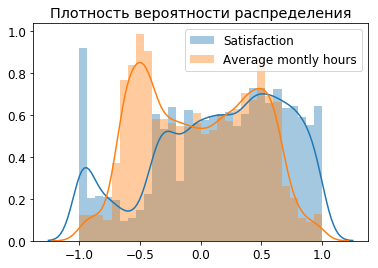

In [106]:
AVH = average_montly_hours - statistics.mean(average_montly_hours)

AVH_Norm = min_max_scaler.fit_transform(np.array(AVH).reshape(-1, 1))

sns.distplot(Satisfaction_Norm)
sns.distplot(AVH_Norm)
plt.title('Плотность вероятности распределения')
plt.legend(['Satisfaction', 'Average montly hours'])
plt.show()

In [108]:
stats.ttest_ind(Satisfaction_Norm, AVH_Norm)

Ttest_indResult(statistic=array([28.51172809]), pvalue=array([1.90001769e-176]))

Высокий показатель t-value и низкий показатель p-value=0 говорит о том, что в обоих примерах группы статистически значимы.

Проверил гипотезы в отношении Текущей удовлетворенности сотрудников и результатов Прошлого исследования,  в так же Кол-ва часов которые сотрудники работают в месяц,  оказались статистически значимыми.  Т.е.  взаимосвязь между параметрами:

Текущей удовлетворенности сотрудников - Кол-ва часов которые сотрудники работают в месяц

Текущей удовлетворенности сотрудников - результат Прошлого исследования 

сущетсвуют.


# 6.Рассчитать сколько работников работает в каждом департаменте.

Шаг 1 - Определяем уникальные значения в столбце подразделения

Шаг 2  - Запускаем в цикле рассчёт  кол-ва работников (длинна выборки с услоивем) 

In [126]:
branches = pd.unique(df[['sales']].values.ravel('K'))

for i in branches:
    print(i, len(df[df['sales']== i]))


sales 4140
accounting 767
hr 739
technical 2720
support 2229
management 630
IT 1227
product_mng 902
marketing 858
RandD 787


# 7.Показать распределение сотрудников по зарплатам.

Выбрал вариан с круговой диагрммой

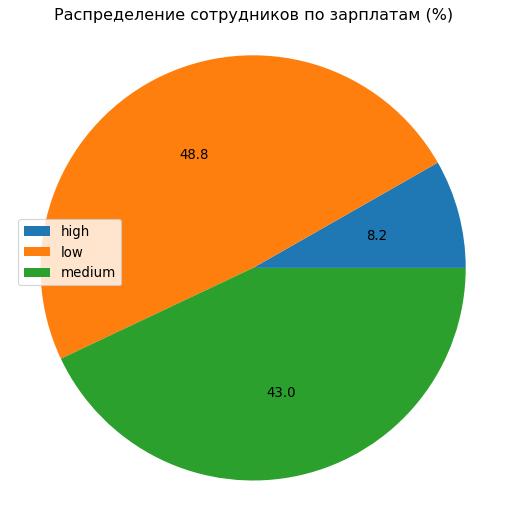

In [90]:
import matplotlib as mpl


fig = plt.figure(dpi = dpi, figsize = (8, 8) )
mpl.rcParams.update({'font.size': 12})

plt.title('Распределение сотрудников по зарплатам (%)')

plt.pie( 
    Salaries['sales'], autopct='%.1f', radius = 1.1)
plt.legend(
   bbox_to_anchor = (0.0, 0.45, 0.25, 0.25),
   loc = 'lower left', labels = Salaries['salary'])


# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Диаграмма "столбиками" с группировкой по Подразделениям

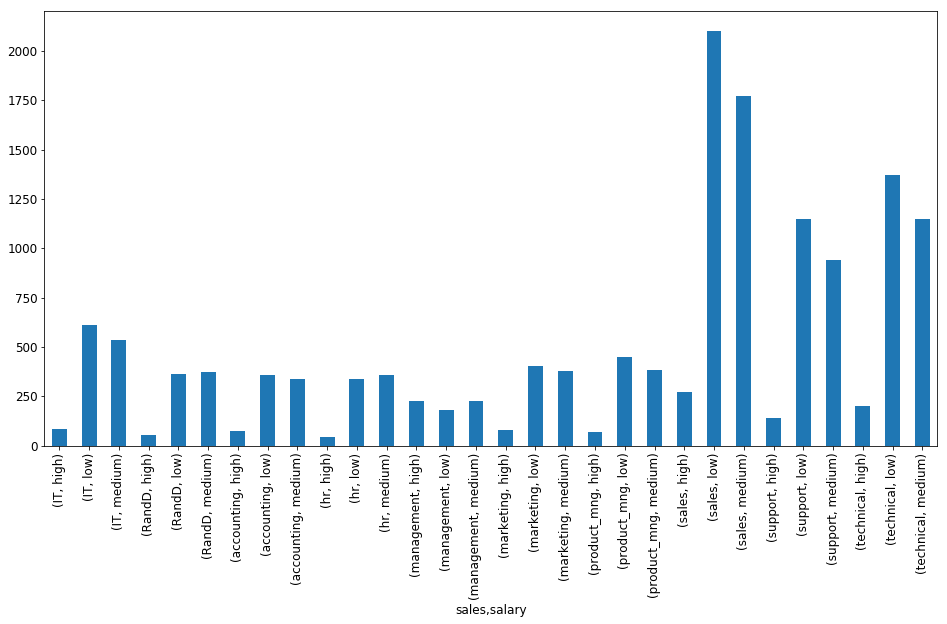

In [96]:


Salaries = df.groupby(['sales','salary']).count()

Salaries['salary_code'].plot(kind='bar', figsize = (16, 8) )


# 9.Сколько сотрудников покинули компанию

Запрос длинны выборки с параметром Уволился(left) = 1

In [60]:

a = len(df[df['left']== 1])
b =  len(df)


print('Компанию поикнули ' + str(a) + ' из ' + str(b) + " сотрудников, или " + str((a*100)//b) + ' %')

Компанию поикнули 3571 из 14999 сотрудников, или 23 %


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Сравниваем три выборки:

1.	Все сотрудники
2.	Те кто уволился 
3.	Те кто остался в компании

Гипотеза 1. Влияет ли на решение уволится  уровень удовлетворённости?
Достаточно вычислить математическое ожидание,  чтобы убедится что уровень удовлетворённости  к тех кто уволился заметно ниже чем во всей компании, а у тех кто остается заметно выше.  Гипотеза подтверждена.    


In [114]:

print('Уроваень удовлетореннности, mean:')
print('Все сотрудники: ', statistics.median(df['satisfaction_level']))
print('Покинувшие компанию: ', statistics.median(df[df['left']==1]['satisfaction_level']))
print('Отсавшиеся в компании: ', statistics.median(df[df['left']==0]['satisfaction_level']))

# вывод,  да у тех кто увольняется уровень удовлетовреннотси заментно ниже, чем у всей группы.  
# Недовольство работой влияет на желание уволиться 

Уроваень удовлетореннности:
Все сотрудники:  0.64
Покинувшие компанию:  0.41
Отсавшиеся в компании:  0.69


In [122]:
def salary_delta(row): return row['satisfaction_level']-row['last_evaluation']
 

df['salary_delta'] = df.apply(salary_delta, axis=1)



Гипотеза 2. Влияет ли изменение удовлетворённости  на решение уволится?  Т.е.  вычисляем разнижу между текущей оценкой удовлетворенности и предыдущей.
 
Снова вычисляем математическое ожидание, чтобы убедится что уровень удовлетворённости к тех кто уволился падал быстрее, чем во всей компании, а у тех кто остается заметно медленнее. Гипотеза подтверждена.  И  в принципе данный опрос работает как минимум для определения тех кто готов уволиться. 


In [123]:
print('Изменение удовлетореннности, mean:')
print('Все сотрудники: ', statistics.median(df['salary_delta']))
print('Покинувшие компанию: ', statistics.median(df[df['left']==1]['salary_delta']))
print('Отсавшиеся в компании: ', statistics.median(df[df['left']==0]['salary_delta']))

# вывод,  да у тех кто уволился уровень удовлетверения снизилос почти в 2 раза больше , чем у всей группы.  
# Динамика изменения недовольства работой влияет на желание уволиться 

Все сотрудники:  -0.07999999999999996
Покинувшие компанию:  -0.1399999999999999
Отсавшиеся в компании:  -0.030000000000000027
